### Import Necessory Packages

In [5]:
!pip install timm albumentations --quiet
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import timm
import matplotlib.pyplot as plt
from google.colab import files


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


### Load Model

In [6]:
model_path = "/content/drive/MyDrive/Semester_5_lab/best_model.pth"
checkpoint = torch.load(model_path, map_location=device)


### Making Prediction In real Time BBy Using saved Model (best_model.pth)

Using device: cpu
Model loaded Successfuly


Saving tuberculosis.jpg to tuberculosis.jpg


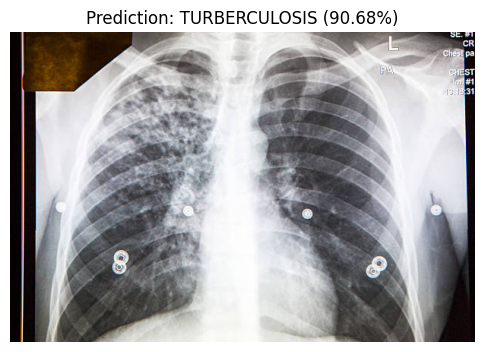

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

CLASSES = ["COVID19", "NORMAL", "PNEUMONIA", "TURBERCULOSIS"]

NUM_CLASSES = len(CLASSES)
model = timm.create_model("efficientnet_b0", pretrained=False)
model.classifier = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(model.classifier.in_features, NUM_CLASSES)
)
model = model.to(device)


checkpoint = torch.load(model_path, map_location=device)
if 'model_state_dict' in checkpoint:
    model.load_state_dict(checkpoint['model_state_dict'])
else:
    model.load_state_dict(checkpoint)
model.eval()
print("Model loaded Successfuly")

MEAN = (0.485, 0.456, 0.406)
STD  = (0.229, 0.224, 0.225)

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=MEAN, std=STD)
])

uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = Image.open(img_path).convert("RGB")


input_tensor = preprocess(img).unsqueeze(0).to(device)  # Add batch dimension

with torch.no_grad():
    outputs = model(input_tensor)
    probs = torch.softmax(outputs, dim=1).cpu().numpy()[0]
    pred_idx = probs.argmax()
    pred_class = CLASSES[pred_idx]
    confidence = probs[pred_idx]

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title(f"Prediction: {pred_class} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()
